# Регрессионный анализ временных рядов для прогнозирования заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Подготовка-тетради" data-toc-modified-id="Подготовка-тетради-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подготовка тетради</a></span></li><li><span><a href="#Загрузка-данных-и-их-предварительный-анализ" data-toc-modified-id="Загрузка-данных-и-их-предварительный-анализ-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных и их предварительный анализ</a></span></li><li><span><a href="#Предварительная-подготовка-данных" data-toc-modified-id="Предварительная-подготовка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предварительная подготовка данных</a></span></li><li><span><a href="#Результаты-подготовки" data-toc-modified-id="Результаты-подготовки-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Результаты подготовки</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Распределение-количества-заказов-в-разных-временных-интервалах" data-toc-modified-id="Распределение-количества-заказов-в-разных-временных-интервалах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Распределение количества заказов в разных временных интервалах</a></span></li><li><span><a href="#Анализ-сдвигов-и-скользящих-средних" data-toc-modified-id="Анализ-сдвигов-и-скользящих-средних-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ сдвигов и скользящих средних</a></span></li><li><span><a href="#Декомпозиция-количества-заказов-на-сезонную-и-трендовую-составляющую-с-шагом-в-1-день" data-toc-modified-id="Декомпозиция-количества-заказов-на-сезонную-и-трендовую-составляющую-с-шагом-в-1-день-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Декомпозиция количества заказов на сезонную и трендовую составляющую с шагом в 1 день</a></span></li><li><span><a href="#Выводы-из-анализа" data-toc-modified-id="Выводы-из-анализа-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выводы из анализа</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Полезные-функции-подготовки-данных-и-подбора-моделей-и-их-параметров" data-toc-modified-id="Полезные-функции-подготовки-данных-и-подбора-моделей-и-их-параметров-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Полезные функции подготовки данных и подбора моделей и их параметров</a></span></li><li><span><a href="#Функции-моделей" data-toc-modified-id="Функции-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Функции моделей</a></span></li><li><span><a href="#Применение-функций" data-toc-modified-id="Применение-функций-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Применение функций</a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li><li><span><a href="#Выводы-из-обучения" data-toc-modified-id="Выводы-из-обучения-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Выводы из обучения</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Проведение-тестирования" data-toc-modified-id="Проведение-тестирования-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Проведение тестирования</a></span></li><li><span><a href="#Выводы-из-тестирования" data-toc-modified-id="Выводы-из-тестирования-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Выводы из тестирования</a></span></li></ul></li><li><span><a href="#Выводы-из-проекта" data-toc-modified-id="Выводы-из-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы из проекта</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Подготовка

### Подготовка тетради

Уважаемый ревьюер! Заранее приношу извинения за следующую ячейку. Она очень удобно мигрирует и пополнятся из проекта в проект. В продакшене данная ячейка будет очищена от лишних импортов.

In [1]:
# Базовые библиотеки
import pandas as pd # Датафреймы
import numpy as np # Математика для массивов
from math import factorial # Факториалы
from scipy import stats as st # Статистика
import os # Библиотека для оптимизации чтения данных из файла
import time # Расчет времени выполнения функций
# Pipeline (пайплайн)
from sklearn.pipeline import(
    Pipeline, # Pipeline с ручным вводом названий шагов.
    make_pipeline # Pipeline с автоматическим названием шагов.
)
# Функция для поддержки экспериментальной функции HavingGridSearchSV
from sklearn.experimental import enable_halving_search_cv
# Ускоренная автоматизация поиска лучших моделей и их параметров
from sklearn.model_selection import HalvingGridSearchCV
# Ускоренная автоматизация рандомного поиска лучших моделей и их параметров
from sklearn.model_selection import HalvingRandomSearchCV
# Автоматизация раздельного декодирования признаков
from sklearn.compose import(
    make_column_selector, 
    make_column_transformer, 
    ColumnTransformer
)

# Обработка данных для машинного обучения
# Стандартизация данных
import re
#! pip install sklearn.preprocessing 
from sklearn.preprocessing import(
    OneHotEncoder, # Создание отдельных столбцов для каждого категориального значения, drop='first' (удаление первого столбца против dummy-ловушки), sparse=False (?)
    OrdinalEncoder, # Кодирование порядковых категориальных признаков
    #TargetEncoder, # Кодирование категорий на основе таргетов (ошибка, модуль не найден) 
    LabelEncoder, 
    StandardScaler, 
    MinMaxScaler
)
# Кодирование категорий на основе таргетов 
#!pip install -pU category_encoders
#from category_encoders.target_encoder import TargetEncoder
# Другие функции предобработки данных
from sklearn.impute import KNNImputer # Заполнение пропусков в данных методом k-блжиайших соседей.
from sklearn.utils import shuffle # Перемешивание данных для уравновешивания их в разных выборках
from statsmodels.stats.outliers_influence import variance_inflation_factor # Коэффициент инфляции дисперсии (5 и более - признак коррелирует со всеми остальными, его можно удалить и выразить через другие признаки)
from sklearn.model_selection import(
    GridSearchCV, # Поиск гиперпараметров по сетке (GridSearch)
    train_test_split, # Разделение выборок с целевыми и нецелевыми признаками на обучающую и тестовую
    TimeSeriesSplit, # Разделение обучающей выборки при кросс-валидации (!) временных рядов
    validation_curve, 
    StratifiedKFold, # Кроссвалидация с указанием количества фолдов (частей, на которые будет разбита обучающая выборка, одна из которых будет участвовать в валидации)
    KFold, # Кроссвалидация 
    cross_val_score # Оценка качества модели на кроссвалидации
)
# Различные модели машинного обучения (в данном проекте требуется регрессия)
# (есть разбор на https://russianblogs.com/article/83691573909/)
# Линейная модель
from sklearn.linear_model import(
    #LogisticRegression, # Линейная классификация
    LinearRegression, # Линейная регрессия
    Ridge , # Линейная регрессия. "Хребтовая" регрессия (метод наименьших квадратов)
    BayesianRidge , # Линейная регрессия. Байесовская "хребтовая" регрессия (максимизации предельного логарифмического правдоподобия)
    SGDRegressor # Линейная регрессия. SGD - Стохастический градиентный спуск (минимизирует регуляризованные эмпирические потери за счет стохастического градиентного спуска)
)
# Решающее дерево
from sklearn.tree import(
    #DecisionTreeClassifier, # Решающее дерево. Классификация
    DecisionTreeRegressor # Решающее дерево. Регрессия
)
# Случайный лес
from sklearn.ensemble import(
    #RandomForestClassifier, # Случайный лес. Классификация
    RandomForestRegressor # Случайный лес. Регрессия
)
# Машина опорных векторов
from sklearn.svm import(
    SVR # # Линейная модель. Регрессия с использованием опорных векторов
)
# Нейронная сеть
from sklearn.neural_network import(
    MLPRegressor # Нейронная сеть. Регрессия
)
# CatBoost (made in Yandex)
from catboost import(
    CatBoostRegressor # CatBoost (Яндекс). Регрессия
)
# LightGBM
from lightgbm import(
    LGBMRegressor # LightGBM. Регрессия
)
# Метрики (Показатели качества моделей)
from sklearn.metrics import(
    # Метрики для моделей регрессии
    mean_absolute_error, # MAE, Средняя абсолютная ошибка (не чувствительная к выбросам)
    mean_absolute_percentage_error, # MAPE, Средняя абсолютная ошибка в % (универсальная в %)
    mean_squared_error, # MSE, Средняя квадратичная ошибка (дисперсия, чувствительная к выбросам), RMSE (сигма) = mean_squared_error(test_y, preds, squared=False)
    r2_score, # R^2, Коэффициент детерминации (универсальная в %, чувствительная к выбросам, может быть отрицательной и возвращать NaN)
    
    # Другое
    make_scorer, # Функция для использования собственных функций в параметре scoring функции HalvingGridSearchCV
    ConfusionMatrixDisplay
)

# Анализ сезонности и трендов
from statsmodels.tsa.seasonal import seasonal_decompose 

# Визуализация графиков
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rcParams, rcParamsDefault
from pandas.plotting import scatter_matrix
# Для поиска совпадений 
# в названиях населённых пунктов
from fuzzywuzzy import fuzz
from fuzzywuzzy import process


/opt/conda/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# Отображение всех столбцов таблицы
pd.set_option('display.max_columns', None)
# Обязательно для нормального отображения графиков plt
rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'svg'
# Дополнительно и не обязательно для декорирования графиков
factor = .8
default_dpi = rcParamsDefault['figure.dpi']
rcParams['figure.dpi'] = default_dpi * factor

# Глобальная переменная 
# для функций со случайными значениями
STATE = 42


### Загрузка данных и их предварительный анализ

In [3]:
# Загрузка данных
def read_csv_file(path1, path2):
    if os.path.exists(path1):
        data = pd.read_csv(
            path1, 
            index_col=[0], 
            parse_dates=[0] 
        )
    elif os.path.exists(path12):
        data = pd.read_csv(
            path2, 
            index_col=[0], 
            parse_dates=[0])
    else:
        print('Файл не найден')
    return data

data = read_csv_file(
    '/datasets/taxi.csv', 
    'datasets/taxi.csv' 
)


In [4]:
# Анализ датафрейма
print(data.info()) 
data.head() 


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


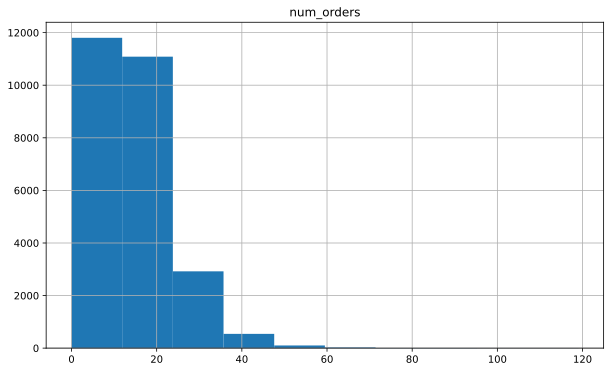

In [5]:
# Анализ значений датафрейма
data.hist() 
data.describe() 


**Выводы из предварительного анализа**

1. Датафрейм изначально содержал всего два признака: `datetime` (дата со временем) и `num_orders` (число заказов), а также 26496 объектов без пропусков. 
1. Признак `datetime` использован в качестве индексов. 
1. Признак `num_orders` имеет небольшие значения и может быть приведён к типу `int32`. 
1. Согласно условию задачи требуется ресемплировать датафрейм до 1 часа. 

### Предварительная подготовка данных

In [7]:
# Ресемплирование данных до 1 часа
data = data.resample('1H').sum()


In [8]:
# Оптимизация типа данных 
# признака "num_orders" 
data['num_orders'] = data['num_orders'].astype('int32') 


In [9]:
# Анализ датафрейма после
# предварительной подготовки
data.info() 
data.head() 


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int32
dtypes: int32(1)
memory usage: 51.8 KB


,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


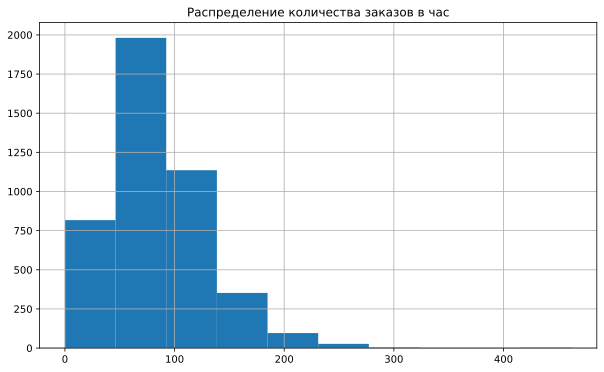

In [10]:
# Анализ значений датафрейма после
# предварительной подготовки
data.rename(
    columns={'num_orders':'Количество заказов'} 
).hist() 
plt.title('Распределение количества заказов в час') 
data.describe() 


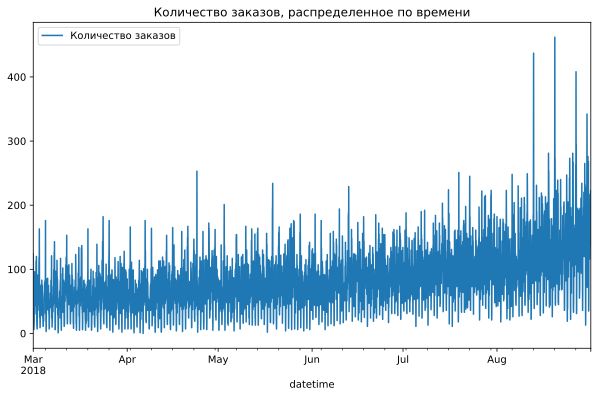

In [11]:
data.rename( 
    columns={'num_orders':'Количество заказов'} 
).plot(
    title='Количество заказов, распределенное по времени'
);


**Результаты предварительной обработки данных**

1. При загрузке датафрейма индексы заменены на значения признака `datetime`. 
1. Данные ресемплированы до 1 часа. 
1. Оптимизировать данных признака `num_orders`. 
1. В результате предварительной обработки датафрейм имеет 1 признак и 4416 объектов, а индексы в виде даты и времени с 00:00 1 марта по 23:00 31 августа 2018 года. Каждый объект соответствует одному часу, следующему в хронологческом порядке. 

### Результаты подготовки

Изначально датафрейм содержал два признака: `datetime` (дата со временем) и `num_orders` (число заказов), а также 26496 объектов без пропусков. Признак `datetime` был использован в качестве индексов при загрузке датафрейма. Признак `num_orders` оптимизирован путем приведения к типу `int32`. Согласно условию задачи датафрейм ресемплирован до 1 часа.

В результате предварительной обработки датафрейм имеет 1 признак `num_orders` и 4416 объектов, а индексы в виде даты и времени.

## Анализ

В рамках данного проекта будт проанализированы:

1. Распределение количества заказов в разных временных интервалах.
1. Сдвиги и скользящие средние.
1. Декомпозиция количества заказов на сезонную и трендовую составляющую с шагом в 1 день

### Распределение количества заказов в разных временных интервалах

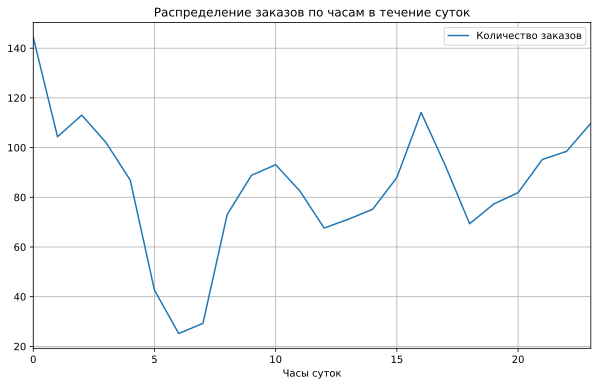

In [12]:
# Распределение заказов по часам в течение суток
data.groupby(data.index.hour).mean().rename(
    columns={'num_orders':'Количество заказов'}
).plot(
    title='Распределение заказов по часам в течение суток', 
    xlabel='Часы суток', 
    xlim=(0, 23), 
    grid=True
);


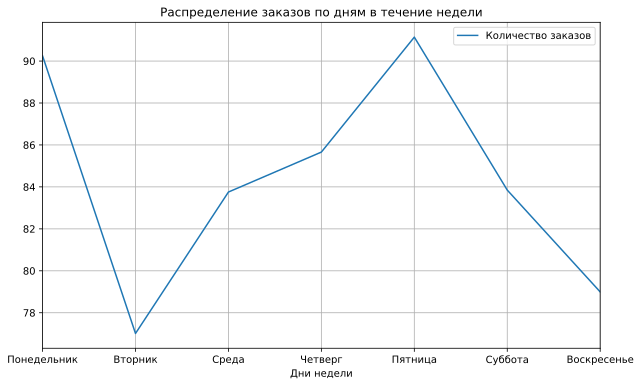

In [13]:
# Распределение заказов по дням в течение недели
data.groupby(data.index.weekday).mean().rename(
    columns={'num_orders':'Количество заказов'}, 
    index={0:'Понедельник', 1:'Вторник', 2:'Среда', 3:'Четверг', 4:'Пятница', 5:'Суббота', 6:'Воскресенье'}
).plot(
    title='Распределение заказов по дням в течение недели', 
    xlabel='Дни недели', 
    xlim=(0, 6), 
    grid=True
);


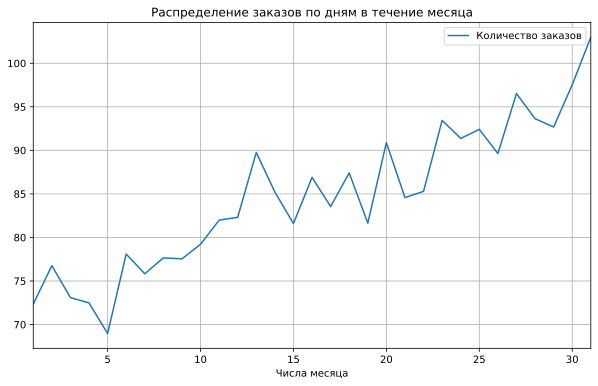

In [14]:
# Распределение заказов по дням в течение месяца
data.groupby(data.index.day).mean().rename(
    columns={'num_orders':'Количество заказов'}
).plot(
    title='Распределение заказов по дням в течение месяца', 
    xlabel='Числа месяца', 
    xlim=(1, 31), 
    grid=True
);


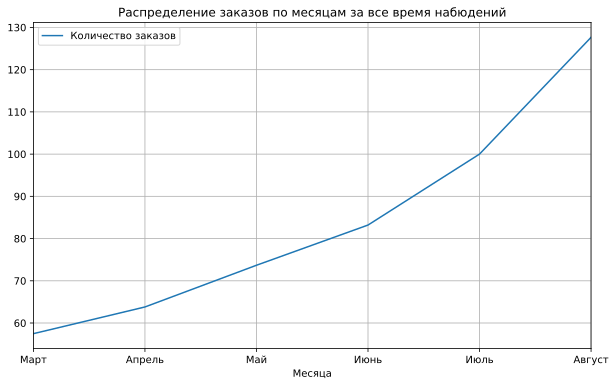

In [15]:
# Распределение заказов по месяцам за все время набюдений
data.groupby(data.index.month).mean().rename(
    columns={'num_orders':'Количество заказов'}, 
    index={3:'Март', 4:'Апрель', 5:'Май', 6:'Июнь', 7:'Июль', 8:'Август'}
).plot(
    title='Распределение заказов по месяцам за все время набюдений', 
    xlabel='Месяца', 
    xlim=(0, 5), 
    grid=True
);


**Выводы из распределения количества заказов в разных временных интервалах**
1. В среднем в течение суток минимум заказов бывает в 6 часов утра, а максимум в полночь. Между максимумом и минимумом набюдаются выраженные эстремумы. Так, максимальное количество заказов наблюдается в 10 утра и 16 часов дня, а минимальное в полдень и 18 часов вечера.
1. В среднем в течение недели наблюдается выраженное снижение активности во втроник и воскресенье, между которыми стабильный рост до максимумомов в понедельник и пятницу.
1. В среднем в течение месяца наблюдается рост от начала к концу месяца. Минимум заказов 5 числа, максимум 31 числа.
1. Наблюдается рост количества заказов от месяца к месяцу.

### Анализ сдвигов и скользящих средних

In [16]:
# Создание аналитического датафрейма
data_analisys = data.copy()  
data_analisys.head() 


,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [17]:
# Функция для создания новых признаков
# путем сдвига итерационно
def shift(data, target, start, finish, step): 
    for i in range(start, finish, step): 
        string = 'shift_' + str(i) 
        data[string] = data[target].shift(i)
    return data


In [18]:
# Функция для создания новых признаков
# со скользящими средними путем сдвига на 1 час итерационно
def rolling_mean_shift(data, target, start, finish, step): 
    for i in range(start, finish, step): 
        string = 'rolling_mean_' + str(i) + '_shift_1' 
        data[string] = data[target].shift().rolling(i).mean()
    return data


In [19]:
# Функция для создания новых ризнаков
# со скользящими средними итерационно
def rolling_mean(data, target, start, finish, step): 
    for i in range(start, finish, step): 
        string = 'rolling_mean_' + str(i) 
        data[string] = data[target].rolling(i).mean()
    return data


In [20]:
# Сдвиг с разным количеством часов
data_analisys = shift(data_analisys, 'num_orders', 1, 25, 1)
data_analisys = shift(data_analisys, 'num_orders', 48, 169, 24) 


In [21]:
# Скользящее среднее со сдвигом в 1 час
# и окном 168 часов, т.к. наблюдается
# "недельная сезонность". С таким окном 
# тренд будет более гладким
data_analisys = rolling_mean_shift(data_analisys, 'num_orders', 168, 168, 1) 


In [22]:
# Удаление объектов с пустыми значениями
data_analisys = data_analisys.dropna() 


In [23]:
# Вывод на печать RMSE сдвигов и скользящих средних
for i in data_analisys.columns:
    if i != 'num_orders':
        print('RMSE', i, '=', mean_squared_error(
            data_analisys[i], 
            data_analisys['num_orders'], 
            squared=False
        )) 


RMSE shift_1 = 39.30292142790866
RMSE shift_2 = 46.945798072729566
RMSE shift_3 = 52.952578009864375
RMSE shift_4 = 55.63490331656302
RMSE shift_5 = 56.233426099809954
RMSE shift_6 = 55.86740254089737
RMSE shift_7 = 53.87424107330057
RMSE shift_8 = 53.090801832062915
RMSE shift_9 = 54.62524483131728
RMSE shift_10 = 54.888993010186624
RMSE shift_11 = 52.785766072035706
RMSE shift_12 = 52.10447367572656
RMSE shift_13 = 52.879965251946615
RMSE shift_14 = 54.96986847972229
RMSE shift_15 = 55.78799702492222
RMSE shift_16 = 54.35478632659841
RMSE shift_17 = 55.052089697282746
RMSE shift_18 = 56.698811089014214
RMSE shift_19 = 57.2117354587293
RMSE shift_20 = 56.45780510312234
RMSE shift_21 = 54.76864110934485
RMSE shift_22 = 49.250063332241055
RMSE shift_23 = 42.425399798029
RMSE shift_24 = 35.399379297015024
RMSE shift_48 = 33.229463873243596
RMSE shift_72 = 34.112244793051836
RMSE shift_96 = 34.15574098427023
RMSE shift_120 = 33.298664881080796
RMSE shift_144 = 36.11251771851234
RMSE shift

In [24]:
# Удаление не востребованной далее переменной
del data_analisys


**Выводы из анализа сдвигов и скользящих средних**

1. Минимальную ошибку RMSE дает скользящее среднее с окном в 2 часа.
1. Минимальные ошибки RMSE среди скользящих и сдвигов, применимые для предсказания будущих периодов, наблюдаются при сдвиге на 168 часов (1 неделя). С большим отрывом, но тоже хороший результат показали сдвиги на 48, 72, 96 и 120 часов (2, 3, 4 и 5 суток). 

Из полученных результатов можно сделать вывод о том, что почасовые значения аналогичного периода предыдущей недели дают наиболее точное предсказание текущих почасовых предсказываемых значений. Т.е. для предсказания количества заказов с 11:00 до 12:00 10.08.2023 требуется использовать количество заказов с 11:00 до 12:00 03.08.2023.

### Декомпозиция количества заказов на сезонную и трендовую составляющую с шагом в 1 день

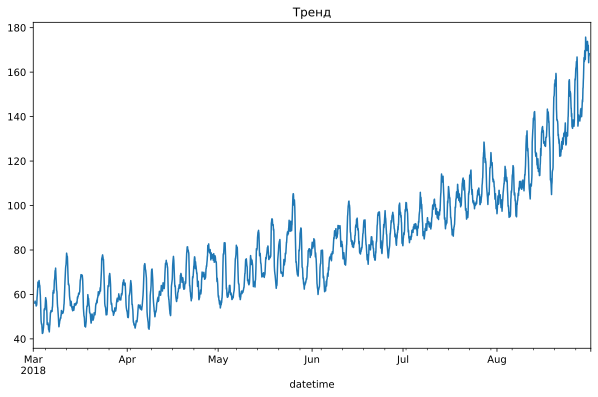

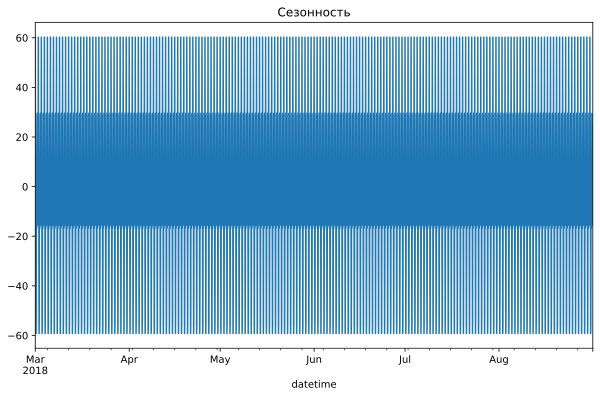

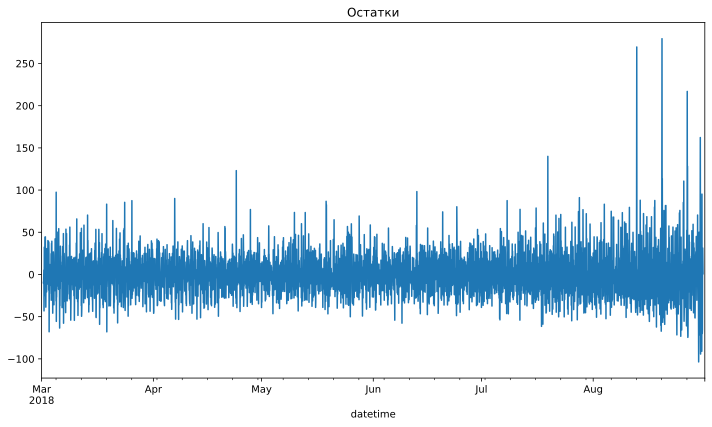

In [25]:
# Декомпозиция на сезонную 
# и трендовую составляющую
# с шагом в 1 день
decomposed = seasonal_decompose(data['num_orders'].resample('1H').sum())
#plt.figure(figsize=(10, 14))
#plt.subplot(311)
plt.show() 
# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')
#plt.subplot(312)
plt.show()
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Сезонность')
#plt.subplot(313)
plt.show()
decomposed.resid.plot(ax=plt.gca())
plt.title('Остатки')
plt.tight_layout()


**Выводы из анализа декомпозиции количества заказов на сезонную и трендовую составляющую с шагом в 1 день**

1. Наблюдаются постепенно растущий тренд. Наиболее значимые корректировки тренда приходятся на начала апреля, мая, июня, августа.
1. Заметны 7-дневные (еженедельные) колебания. 
1. Наиболее выраженные тренд и "сезонность" наблюдаются с середины марта по середину апреля, когда волатильность остатков минимальна. Минимально выраженны тренд и "сезонность" в начале марта и во второй половине августа, когда колебания остатков максимальны.
1. В августе наблюдаются существенные выбросы остатков. Данные этого периода попадут в тестовую выборку и могут ухудшить результаты предсказаний. 

### Выводы из анализа

1. В среднем в течение суток минимум заказов бывает в 6 часов утра, а максимум в полночь. Между максимумом и минимумом набюдаются выраженные эстремумы. Так, максимальное количество заказов наблюдается в 10 утра и 16 часов дня, а минимальное в полдень и 18 часов вечера.
1. В среднем в течение недели наблюдается выраженное снижение активности во втроник и воскресенье, между которыми стабильный рост до максимумомов в понедельник и пятницу.
1. В среднем в течение месяца наблюдается рост от начала к концу месяца. Минимум заказов 5 числа, максимум 31 числа.
1. Наблюдается рост количества заказов от месяца к месяцу.
1. Минимальные ошибки RMSE среди скользящих и сдвигов, применимые для предсказания будущих период, наблюдаются при сдвиге на 24 часа и при использовании скользящего среднего со сдвигом 1 час и размером окна в 24 часа. Т.е. для предсказания количества заказов с 11:00 до 12:00 05.08.2023 требуется использовать количество заказов с 11:00 до 12:00 04.08.2023. Либо использовать для этого среднее почасовое количество заказов с 10:00 04.08.2023 до 11:00 05.08.2023.
1. Наблюдаются постепенно растущий тренд. Наиболее значимые корректировки тренда приходятся на начала апреля, мая, июня, августа.
1. Заметны 7-дневные (еженедельные) колебания. 
1. Наиболее выраженные тренд и "сезонность" наблюдаются с середины марта по середину апреля, когда волатильность остатков минимальна. Минимально выраженны тренд и "сезонность" в начале марта и во второй половине августа, когда колебания остатков максимальны.
1. В августе наблюдаются существенные выбросы остатков. Данные этого периода попадут в тестовую выборку и могут ухудшить результаты предсказаний. 

## Обучение

### Полезные функции подготовки данных и подбора моделей и их параметров

In [26]:
# Функция подготовки данных перед подбором моделей и их параметров
def data_preprocessing(data, target_name):
    
    # Перемешивание объектов 
    # для их лучшего распределения в выборках
    # (нельзя исползовать во временных рядах)
    #data = shuffle(data, random_state=STATE)
    
    # Разделение датафреймов на целевую и нецелевую выборку
    features = data.drop([target_name], axis=1)
    target = data[target_name]

    # Разделение целевой и нецелевой выборки 
    # на обучающие и тестовые выборки
    features_train,  features_test, target_train, target_test = train_test_split(
        features, 
        target, 
        test_size=.25, 
        shuffle=False, 
        random_state=STATE
    )
    
    return features_train,  features_test, target_train, target_test


In [27]:
# Функция создания структуры пайплайна
def params_and_model_selection(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    model_params
):
    
    start_time = time.time()
    #funtion_time = %timeit
    
    # Стандартизация числовых значений
    numeric_transformer = make_pipeline(
        StandardScaler()
    )
    
    # Шаг препроцессинга в Пайплайне
    preprocessor = make_column_transformer(
        (numeric_transformer, features_train.columns)
    )
    
    # Pipeline
    pipe = Pipeline([
        ('preprocessor', preprocessor), 
        ('regressor', model_params[0]['regressor'][0])
    ])
    pipe.fit(features_train, target_train)
    #predict = pipe.predict(features_test) # спорно, т.к. это должно быть в результате, а здесь должна использоваться валидационная выборка
    
    # Передача функции ошибки через make_scorer в HalvingGridSearchCV
    smape_score = make_scorer(
        mean_squared_error, 
        squared=False # Для RMSE
    )
    
    # Кросс-валидация специально для временных рядов
    tscv = TimeSeriesSplit(n_splits=5) 
    
    # HalvingGridSearchCV
    # (о подборе оптимальных параметров:
    # https://scikit-learn.ru/3-2-tuning-the-hyper-parameters-of-an-estimator/)
    #grid = HalvingRandomSearchCV(
    grid = HalvingGridSearchCV(
        pipe, 
        model_params, 
        #cv=4, # параметр KFold для кроссвалидации (обучющая и валидационная выборки 75:25)
        cv=tscv, # реализация параметра KFold кроссвалидации для временных рядов
        n_jobs=-1, # количество параллельно выполняемых заданий (-1 - задействованы все процессоры)
        scoring=smape_score, # Передача функции ошибки через make_scorer в HalvingGridSearchCV
        error_score='raise', #0 , # 
        random_state=STATE
    )
    grid.fit(features_train, target_train)
    
    finish_time = time.time()
    funtion_time = finish_time - start_time
    
    return grid, funtion_time


In [28]:
# Вывод на печать результатов модели
def print_model_result(grids, data_times, model_name):
    print('Модель   :', model_name)
    print('RMSE     :', grids[-1].best_score_)
    print(f'Время    : {data_times[-1]} секунд')
    print('Параметры:\n', grids[-1].best_estimator_)
    print()
    print('-'*20)
    print()


### Функции моделей

In [29]:
# LinearRegression
def grids_LinearRegression(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    grids, 
    data_times
):
    
    grid, time_best = params_and_model_selection(
        features_train, 
        features_test, 
        target_train, 
        target_test, 
        [{
            'regressor': [LinearRegression()] # score: R^2
        }]
    )
    
    grids.append(grid)
    data_times.append(time_best)
    
    return grids, data_times


In [30]:
# DecisionTreeRegressor
def grids_DecisionTreeRegressor(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    grids, 
    data_times
):
    
    grids_this = 0
    grids_best = 0
    funtion_time = 0
    time_best = 0
    
    # Поиск "regressor__max_depth"
    
    range_min = 1
    range_max = 201
    range_step = 20
    
    for i in range(1, 5, 1):
        # Поиск лучших параметров
        grids_this, funtion_time = params_and_model_selection(
            features_train, 
            features_test, 
            target_train, 
            target_test, 
            [{
                'regressor': [DecisionTreeRegressor(random_state=STATE)], # score: R^2
                'regressor__max_depth': range(
                    range_min, 
                    range_max, 
                    range_step
                )
            }]
        )
        # Выбор лучшей модели
        if grids_best == 0:
            grids_best = grids_this
            time_best = funtion_time
        elif grids_this.best_score_ > grids_best.best_score_:
            grids_best = grids_this
            time_best = funtion_time
        if range_step == 1: break
        # Выбор параметров поиска
        regressor__max_depth = grids_this.best_params_['regressor__max_depth']
        if int(regressor__max_depth - range_step / 2) > 0:
            range_min = int(regressor__max_depth - range_step / 2)
        else:
            range_min = regressor__max_depth
        range_max = int(regressor__max_depth + range_step / 2) + 1
        range_step = int(range_step / 2)
    
    grids.append(grids_best)
    data_times.append(time_best)
    
    return grids, data_times


In [31]:
# RandomForestRegressor
def grids_RandomForestRegressor(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    grids, 
    data_times
):
    
    grids_this = 0
    grids_best = 0
    funtion_time = 0
    time_best = 0
    
    # Поиск "regressor__max_depth"
    
    range_min = 20
    range_max = 61
    range_step = 20
    
    for i in range(1, 5, 1):
        
        #print('regressor__max_depth =', range(range_min, range_max, range_step))
        
        # Поиск лучших параметров
        grids_this, funtion_time = params_and_model_selection(
            features_train, 
            features_test, 
            target_train, 
            target_test, 
            [{
                'regressor': [RandomForestRegressor(random_state=STATE)], # score: R^2
                'regressor__max_depth': range(
                    range_min, 
                    range_max, 
                    range_step
                ), 
                'regressor__n_estimators': [1]
            }]
        )
        # Выбор лучшей модели
        if grids_best == 0:
            grids_best = grids_this
            time_best = funtion_time
        elif grids_this.best_score_ > grids_best.best_score_: 
            grids_best = grids_this
            time_best = funtion_time
        if range_step == 1: break
        # Выбор параметров поиска
        regressor__max_depth = grids_this.best_params_['regressor__max_depth']
        if int(regressor__max_depth - range_step / 2) > 0:
            range_min = int(regressor__max_depth - range_step / 2)
        else:
            range_min = regressor__max_depth
        range_max = int(regressor__max_depth + range_step / 2) + 1
        range_step = int(range_step / 2)
        if range_step == 0: range_step = 1
    
    # Поиск "regressor__n_estimators"
    
    range_min = 10
    range_max = 31
    range_step = 10
    
    for i in range(1, 5, 1):
        
        #print('regressor__n_estimators =', range(range_min, range_max, range_step))
        
        # Поиск лучших параметров
        grids_this, funtion_time = params_and_model_selection(
            features_train, 
            features_test, 
            target_train, 
            target_test, 
            [{
                'regressor': [RandomForestRegressor(random_state=STATE)], # score: R^2
                'regressor__max_depth': [regressor__max_depth], 
                'regressor__n_estimators': range(
                    range_min, 
                    range_max, 
                    range_step
                )
            }]
        )
        # Выбор лучшей модели
        if grids_best == 0: 
            grids_best = grids_this
            time_best = funtion_time
        elif grids_this.best_score_ > grids_best.best_score_: 
            grids_best = grids_this
            time_best = funtion_time
        if range_step == 1: break
        # Выбор параметров поиска
        regressor__n_estimators = grids_this.best_params_['regressor__n_estimators']
        if int(regressor__n_estimators - range_step / 2) > 0:
            range_min = int(regressor__n_estimators - range_step / 2)
        else:
            range_min = regressor__n_estimators
        range_max = int(regressor__n_estimators + range_step / 2) + 1
        range_step = int(range_step / 10)
        if range_step == 0: range_step = 1
    
    grids.append(grids_best)
    data_times.append(time_best)
    
    return grids, data_times


In [32]:
# CatBoostRegressor
def grids_CatBoostRegressor(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    grids, 
    data_times
):
    
    # Поиск лучших параметров
    
    grids_best, time_best = params_and_model_selection(
        features_train, 
        features_test, 
        target_train, 
        target_test, 
        [{
            'regressor': [CatBoostRegressor()]
        }]
    )
    
    
    grids.append(grids_best)
    data_times.append(time_best)
    
    return grids, data_times


### Применение функций

In [33]:
# Дополнение датафрейма признаками для предсказания

# Сдвиг с разным количеством часов
data = shift(data, 'num_orders', 1, 25, 1)
data = shift(data, 'num_orders', 48, 169, 24) 

# Удаление объектов с пропусками
data = data.dropna()


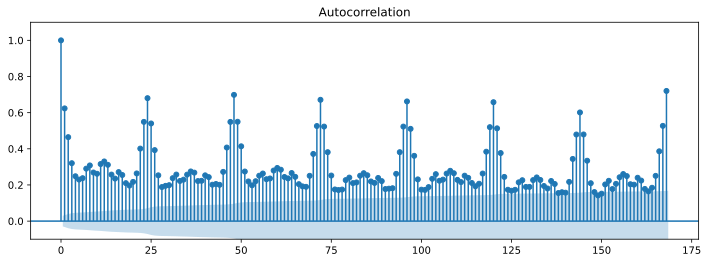

In [35]:
import matplotlib.pyplot as plt


# Код ревьюера
from statsmodels.graphics import tsaplots

taxi = pd.read_csv("/datasets/taxi.csv", index_col=[0], parse_dates=[0]).resample('1H').sum()
ts = taxi['num_orders']

fig = tsaplots.plot_acf(ts,lags= 168)
fig.set_size_inches(12, 4)
plt.ylim(-.1, 1.1)
plt.show() 


In [36]:
# Проверка на корреляцию 
# с учетом новых признаков
data.corr()


,num_orders,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12,shift_13,shift_14,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20,shift_21,shift_22,shift_23,shift_24,shift_48,shift_72,shift_96,shift_120,shift_144,shift_168
num_orders,1.000000,0.620135,0.457495,0.309589,0.237669,0.221121,0.230579,0.283844,0.304086,0.263288,0.256139,0.311835,0.329491,0.309149,0.253096,0.230138,0.268893,0.250149,0.204702,0.190513,0.210192,0.256761,0.398424,0.553358,0.688453,0.721757,0.704936,0.703516,0.715268,0.662852,0.805569
shift_1,0.620135,1.000000,0.619400,0.457005,0.308968,0.237148,0.219818,0.229120,0.282670,0.303873,0.262809,0.255283,0.311336,0.328714,0.308038,0.251818,0.229030,0.269543,0.250961,0.204829,0.188482,0.210151,0.255151,0.397514,0.552344,0.565374,0.550262,0.555192,0.562925,0.526133,0.587533
shift_2,0.457495,0.619400,1.000000,0.619129,0.456444,0.308322,0.235709,0.217957,0.227518,0.282292,0.303217,0.261719,0.254477,0.310314,0.327265,0.306514,0.250393,0.229515,0.270267,0.250881,0.202438,0.188352,0.207948,0.253986,0.395758,0.412541,0.382758,0.401260,0.411728,0.375199,0.427841
shift_3,0.309589,0.457005,0.619129,1.000000,0.618861,0.456084,0.307669,0.234772,0.217100,0.227228,0.281862,0.302633,0.261225,0.253867,0.309518,0.326498,0.305776,0.250576,0.229812,0.270120,0.249841,0.202325,0.187191,0.207294,0.252997,0.268735,0.254242,0.272974,0.276470,0.235401,0.276096
shift_4,0.237669,0.308968,0.456444,0.618861,1.000000,0.618711,0.455610,0.307029,0.234138,0.216949,0.226962,0.281419,0.302365,0.260763,0.253275,0.308928,0.326001,0.306191,0.251090,0.229939,0.269270,0.249815,0.201492,0.186444,0.206243,0.193983,0.189115,0.187268,0.213590,0.167226,0.202079
shift_5,0.221121,0.237148,0.308322,0.456084,0.618711,1.000000,0.618513,0.455449,0.306755,0.234115,0.216867,0.226705,0.281354,0.302125,0.260503,0.252933,0.308706,0.326480,0.306751,0.251381,0.229377,0.269285,0.249486,0.200839,0.185665,0.200142,0.192737,0.185506,0.197632,0.170677,0.178847
shift_6,0.230579,0.219818,0.235709,0.307669,0.455610,0.618513,1.000000,0.617690,0.454482,0.306523,0.233578,0.215931,0.226097,0.280489,0.300952,0.259190,0.251805,0.309360,0.327329,0.306894,0.249467,0.229342,0.267628,0.248359,0.198738,0.196523,0.205320,0.183276,0.217891,0.166067,0.192922
shift_7,0.283844,0.229120,0.217957,0.234772,0.307029,0.455449,0.617690,1.000000,0.617115,0.454578,0.306270,0.232766,0.215577,0.225250,0.279489,0.299797,0.258256,0.252894,0.310676,0.327965,0.305015,0.249565,0.227821,0.266204,0.246102,0.242306,0.249564,0.230417,0.250664,0.222026,0.244383
shift_8,0.304086,0.282670,0.227518,0.217100,0.234138,0.306755,0.454482,0.617115,1.000000,0.617258,0.454454,0.305653,0.232489,0.214849,0.224363,0.278498,0.299067,0.259200,0.253988,0.311212,0.326480,0.305113,0.248364,0.226515,0.264368,0.253019,0.273134,0.249454,0.262986,0.241219,0.263164
shift_9,0.263288,0.303873,0.282292,0.227228,0.216949,0.234115,0.306523,0.454578,0.617258,1.000000,0.617266,0.454429,0.305673,0.232384,0.214782,0.224246,0.278455,0.299423,0.259614,0.254230,0.311209,0.326500,0.305145,0.247978,0.226249,0.220400,0.241174,0.219171,0.224227,0.194741,0.221463


Новые признаки предсказуемо имеют выше среднего корреляцию с целевым признаком, т.к. они созданы на его основе. При этом, корреляция не высокая и потому данный датафрейм может быть использован в машинном обучении. 

Исключением является признак `shift_168` со сдвигом целевого значения на 168 часов. Этот признак имеет высокую корреляцию с целевым признаком, поэтому требуется рассмотреть возможность исключён я его из датафрейма. 

In [37]:
# Удаление высоко коррелирующего признака
data = data.drop('shift_168', axis=1)


In [38]:
# Проверка на корреляцию 
# с учетом новых признаков
data.corr()


,num_orders,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12,shift_13,shift_14,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20,shift_21,shift_22,shift_23,shift_24,shift_48,shift_72,shift_96,shift_120,shift_144
num_orders,1.000000,0.620135,0.457495,0.309589,0.237669,0.221121,0.230579,0.283844,0.304086,0.263288,0.256139,0.311835,0.329491,0.309149,0.253096,0.230138,0.268893,0.250149,0.204702,0.190513,0.210192,0.256761,0.398424,0.553358,0.688453,0.721757,0.704936,0.703516,0.715268,0.662852
shift_1,0.620135,1.000000,0.619400,0.457005,0.308968,0.237148,0.219818,0.229120,0.282670,0.303873,0.262809,0.255283,0.311336,0.328714,0.308038,0.251818,0.229030,0.269543,0.250961,0.204829,0.188482,0.210151,0.255151,0.397514,0.552344,0.565374,0.550262,0.555192,0.562925,0.526133
shift_2,0.457495,0.619400,1.000000,0.619129,0.456444,0.308322,0.235709,0.217957,0.227518,0.282292,0.303217,0.261719,0.254477,0.310314,0.327265,0.306514,0.250393,0.229515,0.270267,0.250881,0.202438,0.188352,0.207948,0.253986,0.395758,0.412541,0.382758,0.401260,0.411728,0.375199
shift_3,0.309589,0.457005,0.619129,1.000000,0.618861,0.456084,0.307669,0.234772,0.217100,0.227228,0.281862,0.302633,0.261225,0.253867,0.309518,0.326498,0.305776,0.250576,0.229812,0.270120,0.249841,0.202325,0.187191,0.207294,0.252997,0.268735,0.254242,0.272974,0.276470,0.235401
shift_4,0.237669,0.308968,0.456444,0.618861,1.000000,0.618711,0.455610,0.307029,0.234138,0.216949,0.226962,0.281419,0.302365,0.260763,0.253275,0.308928,0.326001,0.306191,0.251090,0.229939,0.269270,0.249815,0.201492,0.186444,0.206243,0.193983,0.189115,0.187268,0.213590,0.167226
shift_5,0.221121,0.237148,0.308322,0.456084,0.618711,1.000000,0.618513,0.455449,0.306755,0.234115,0.216867,0.226705,0.281354,0.302125,0.260503,0.252933,0.308706,0.326480,0.306751,0.251381,0.229377,0.269285,0.249486,0.200839,0.185665,0.200142,0.192737,0.185506,0.197632,0.170677
shift_6,0.230579,0.219818,0.235709,0.307669,0.455610,0.618513,1.000000,0.617690,0.454482,0.306523,0.233578,0.215931,0.226097,0.280489,0.300952,0.259190,0.251805,0.309360,0.327329,0.306894,0.249467,0.229342,0.267628,0.248359,0.198738,0.196523,0.205320,0.183276,0.217891,0.166067
shift_7,0.283844,0.229120,0.217957,0.234772,0.307029,0.455449,0.617690,1.000000,0.617115,0.454578,0.306270,0.232766,0.215577,0.225250,0.279489,0.299797,0.258256,0.252894,0.310676,0.327965,0.305015,0.249565,0.227821,0.266204,0.246102,0.242306,0.249564,0.230417,0.250664,0.222026
shift_8,0.304086,0.282670,0.227518,0.217100,0.234138,0.306755,0.454482,0.617115,1.000000,0.617258,0.454454,0.305653,0.232489,0.214849,0.224363,0.278498,0.299067,0.259200,0.253988,0.311212,0.326480,0.305113,0.248364,0.226515,0.264368,0.253019,0.273134,0.249454,0.262986,0.241219
shift_9,0.263288,0.303873,0.282292,0.227228,0.216949,0.234115,0.306523,0.454578,0.617258,1.000000,0.617266,0.454429,0.305673,0.232384,0.214782,0.224246,0.278455,0.299423,0.259614,0.254230,0.311209,0.326500,0.305145,0.247978,0.226249,0.220400,0.241174,0.219171,0.224227,0.194741


In [39]:
# Подготовка выборок из датафрейма

# Разделение обучающего датафрейма на целевую и нецелевую выборку
features_train,  features_test, target_train, target_test = data_preprocessing(data, 'num_orders')

print(features_train.info())
features_train.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3186 entries, 2018-03-08 00:00:00 to 2018-07-18 17:00:00
Freq: H
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   shift_1    3186 non-null   float64
 1   shift_2    3186 non-null   float64
 2   shift_3    3186 non-null   float64
 3   shift_4    3186 non-null   float64
 4   shift_5    3186 non-null   float64
 5   shift_6    3186 non-null   float64
 6   shift_7    3186 non-null   float64
 7   shift_8    3186 non-null   float64
 8   shift_9    3186 non-null   float64
 9   shift_10   3186 non-null   float64
 10  shift_11   3186 non-null   float64
 11  shift_12   3186 non-null   float64
 12  shift_13   3186 non-null   float64
 13  shift_14   3186 non-null   float64
 14  shift_15   3186 non-null   float64
 15  shift_16   3186 non-null   float64
 16  shift_17   3186 non-null   float64
 17  shift_18   3186 non-null   float64
 18  shift_19   3186 non-null   float64
 19  shif

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12,shift_13,shift_14,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20,shift_21,shift_22,shift_23,shift_24,shift_48,shift_72,shift_96,shift_120,shift_144
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-03-08 00:00:00,94.0,127.0,108.0,76.0,50.0,99.0,48.0,46.0,51.0,43.0,55.0,34.0,58.0,34.0,50.0,38.0,17.0,19.0,10.0,73.0,66.0,24.0,121.0,100.0,42.0,86.0,75.0,163.0,90.0
2018-03-08 01:00:00,143.0,94.0,127.0,108.0,76.0,50.0,99.0,48.0,46.0,51.0,43.0,55.0,34.0,58.0,34.0,50.0,38.0,17.0,19.0,10.0,73.0,66.0,24.0,121.0,75.0,176.0,60.0,108.0,120.0
2018-03-08 02:00:00,78.0,143.0,94.0,127.0,108.0,76.0,50.0,99.0,48.0,46.0,51.0,43.0,55.0,34.0,58.0,34.0,50.0,38.0,17.0,19.0,10.0,73.0,66.0,24.0,36.0,32.0,26.0,25.0,75.0
2018-03-08 03:00:00,65.0,78.0,143.0,94.0,127.0,108.0,76.0,50.0,99.0,48.0,46.0,51.0,43.0,55.0,34.0,58.0,34.0,50.0,38.0,17.0,19.0,10.0,73.0,66.0,49.0,51.0,42.0,64.0,64.0
2018-03-08 04:00:00,68.0,65.0,78.0,143.0,94.0,127.0,108.0,76.0,50.0,99.0,48.0,46.0,51.0,43.0,55.0,34.0,58.0,34.0,50.0,38.0,17.0,19.0,10.0,73.0,30.0,34.0,27.0,44.0,20.0


In [40]:
# Поиск лучших моделей и их параметров
data_grids = []
data_times = []


In [41]:
# LinearRegression (dummy-model)
data_grids, data_times = grids_LinearRegression(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    data_grids, 
    data_times
)
print_model_result(data_grids, data_times, 'LinearRegression')


Модель   : LinearRegression
RMSE     : 21.963961830527317
Время    : 1.5816013813018799 секунд
Параметры:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['shift_1', 'shift_2', 'shift_3', 'shift_4', 'shift_5', 'shift_6',
       'shift_7', 'shift_8', 'shift_9', 'shift_10', 'shift_11', 'shift_12',
       'shift_13', 'shift_14', 'shift_15', 'shift_16', 'shift_17', 'shift_18',
       'shift_19', 'shift_20', 'shift_21', 'shift_22', 'shift_23', 'shift_24',
       'shift_48', 'shift_72', 'shift_96', 'shift_120', 'shift_144'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

--------------------



In [42]:
# DecisionTreeRegressor
data_grids, data_times = grids_DecisionTreeRegressor(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    data_grids, 
    data_times
)
print_model_result(data_grids, data_times, 'DecisionTreeRegressor')


Модель   : DecisionTreeRegressor
RMSE     : 31.302573505395564
Время    : 2.1100189685821533 секунд
Параметры:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['shift_1', 'shift_2', 'shift_3', 'shift_4', 'shift_5', 'shift_6',
       'shift_7', 'shift_8', 'shift_9', 'shift_10', 'shift_11', 'shift_12',
       'shift_13', 'shift_14', 'shift_15', 'shift_16', 'shift_17', 'shift_18',
       'shift_19', 'shift_20', 'shift_21', 'shift_22', 'shift_23', 'shift_24',
       'shift_48', 'shift_72', 'shift_96', 'shift_120', 'shift_144'],
      dtype='object'))])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=161, random_state=42))])

--------------------



In [43]:
# RandomForestRegressor 
data_grids, data_times = grids_RandomForestRegressor(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    data_grids, 
    data_times
)
print_model_result(data_grids, data_times, 'RandomForestRegressor')


Модель   : RandomForestRegressor
RMSE     : 32.970024310279314
Время    : 5.284083127975464 секунд
Параметры:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['shift_1', 'shift_2', 'shift_3', 'shift_4', 'shift_5', 'shift_6',
       'shift_7', 'shift_8', 'shift_9', 'shift_10', 'shift_11', 'shift_12',
       'shift_13', 'shift_14', 'shift_15', 'shift_16', 'shift_17', 'shift_18',
       'shift_19', 'shift_20', 'shift_21', 'shift_22', 'shift_23', 'shift_24',
       'shift_48', 'shift_72', 'shift_96', 'shift_120', 'shift_144'],
      dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(max_depth=60, n_estimators=1,
                                       random_state=42))])

--------

In [44]:
# CatBoostRegressor
data_grids, data_times = grids_CatBoostRegressor(
    features_train, 
    features_test, 
    target_train, 
    target_test, 
    data_grids, 
    data_times
)
print_model_result(data_grids, data_times, 'CatBoostRegressor')


Learning rate set to 0.049169
0:	learn: 33.9824879	total: 60.9ms	remaining: 1m
1:	learn: 33.1848914	total: 73.7ms	remaining: 36.8s
2:	learn: 32.3944481	total: 84.2ms	remaining: 28s
3:	learn: 31.6594623	total: 93ms	remaining: 23.2s
4:	learn: 31.0002022	total: 99.1ms	remaining: 19.7s
5:	learn: 30.3814178	total: 105ms	remaining: 17.4s
6:	learn: 29.7912262	total: 111ms	remaining: 15.8s
7:	learn: 29.1757309	total: 117ms	remaining: 14.5s
8:	learn: 28.6605162	total: 122ms	remaining: 13.5s
9:	learn: 28.1600209	total: 128ms	remaining: 12.7s
10:	learn: 27.7090365	total: 137ms	remaining: 12.3s
11:	learn: 27.2608745	total: 147ms	remaining: 12.1s
12:	learn: 26.8125215	total: 157ms	remaining: 11.9s
13:	learn: 26.4144437	total: 168ms	remaining: 11.9s
14:	learn: 26.0219023	total: 174ms	remaining: 11.4s
15:	learn: 25.6508323	total: 182ms	remaining: 11.2s
16:	learn: 25.2994712	total: 190ms	remaining: 11s
17:	learn: 24.9828069	total: 196ms	remaining: 10.7s
18:	learn: 24.6825822	total: 202ms	remaining: 10

### Выбор лучшей модели

In [45]:
# Лучшая модель из расчета RMSE
data_grids_best = data_grids[0]
data_times_best = data_times[0]
n = 0
for i in range(0, len(data_grids)):
    if data_grids[i].best_score_ < data_grids_best.best_score_: 
    #if (data_grids[i].best_score_ < data_grids_best.best_score_) & (data_times[i] < data_times_best): 
        data_grids_best = data_grids[i]
        data_times_best = data_times[i]

print('Лучшее время : ', data_times_best)
print('Лучшее RMSE  : ', data_grids_best.best_score_)
print('Лучшая модель: ')
data_grids_best


Лучшее время :  55.57100772857666
Лучшее RMSE  :  21.08639239601687
Лучшая модель: 


HalvingGridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                    error_score='raise',
                    estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('pipeline',
                                                                                Pipeline(steps=[('standardscaler',
                                                                                                 StandardScaler())]),
                                                                                Index(['shift_1', 'shift_2', 'shift_3', 'shift_4', 'shift_5', 'shift_6',
       'shift_7', 'shift_8', 'shift_9', '...
       'shift_48', 'shift_72', 'shift_96', 'shift_120', 'shift_144'],
      dtype='object'))])),
                                              ('regressor',
                                               <catboost.core.CatBoostRegressor object at 0x7ff27eddf340>)]),
          

### Выводы из обучения

Самой эффективной моделью с точки зрения RMSE, но и самой медленной оказалась модель `CatBoostRegressor` с параметрами по умолчанию. Данная модель показала RMSE более чем на половину меньше требуемого в техническом задании.

## Тестирование

### Проведение тестирования

In [46]:
start_time = time.time()

# Предсказание лучшей модели
predict = data_grids_best.predict(features_test)

finish_time = time.time()
funtion_time = finish_time - start_time

# Расчет RMSE и времени выполнения предсказания
print('RMSE              :', mean_squared_error(target_test, predict, squared=False))
print(f'Время предсказания: {funtion_time} секунд')


RMSE              : 40.03656030838836
Время предсказания: 0.009637832641601562 секунд


### Выводы из тестирования

Модель `CatBoostRegressor` с параметрами по умолчанию при тестировании показала значение RMSE почти в 2 раза больше, чем с обучающей выборкой, но меньше требуемого техническим заданием. Важно отметить очень мальнькое время в 1/600 секунды, которое требуется модели для предсказания.

## Выводы из проекта

Цель проекта достигнута. Для предсказания количества заказов на часовых интервалах выбрана модель `CatBoostRegressor` с параметрами по умолчанию. Ее значение RMSE на тестовых данных равно 40, что меньше требуемого в техническом задании.

Здесь важно заметить, что предсказание путем использования сдвига на 168 часов (1 неделю) даёт RMSE в размере 27.57, что лучше, чем лучший результат модели машинного обучения. Значит есть больше возможностей выбора эффектных инструментов для предсказания целевого количества заказов такси. 

Для достижения цели было выполнено:
1. Подготовлена тетрадь.
1. Загружены и подготовлены данные.
1. Проанализрованы данные в датафрейме.
1. Выбрана и обучена модель.
1. Проведено тестирование модели

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48